In [2]:
import numpy as np 

import matplotlib.pyplot as plt

In [10]:

def f(x,y):
    return x**2 + y**2

def zeta(X,Y,res):
    Z = np.zeros((res,res))
    for xi, x in enumerate(X):
        for yi, y in enumerate(Y):
            Z[yi,xi] = f(x,y)
    
    return Z

def gradient(p):
    h = 0.01
    grad = np.zeros(2)
    for it, th in enumerate(theta):
        P = np.copy(p)

        P[it] = P[it] + h 

        parcial_deriv = (f(P[0],P[1]) - f(p[0],p[1]))/h

        grad[it] = parcial_deriv
    return grad

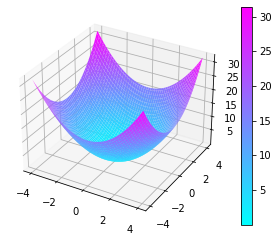

In [11]:
fig, ax = plt.subplots(subplot_kw = {"projection":"3d"})

res = 100

x = np.linspace(-4, 4, res)
y = np.linspace(-4, 4, res)

Z = zeta(x,y,res)

X,Y = np.meshgrid(x,y)

surf = ax.plot_surface(X,Y,Z,cmap = "cool")

fig.colorbar(surf)


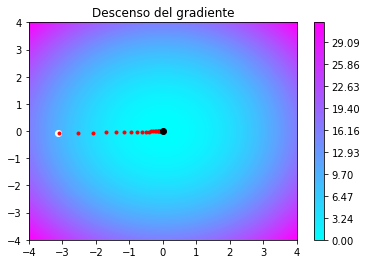

In [14]:
level_map = np.linspace(np.min(Z),np.max(Z),res)
plt.contourf(X,Y,Z,levels = level_map,cmap = "cool")
plt.colorbar()
plt.title("Descenso del gradiente")

theta = np.random.random(2)*8 - 4
plt.plot(theta[0],theta[1],'o',c='white')

lr = 0.001
for _ in range(10000):
    grad = gradient(theta)
    theta = theta - lr*grad 
        
    if _ % 100 == 0:
        plt.plot(theta[0],theta[1],'.',c='red')

plt.plot(theta[0],theta[1],'o',c='black')       